In [1]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.units as u
import astropy.constants as c

import scipy.optimize as opt  

import newdust

import cProfile
import pstats
from pstats import SortKey

In [2]:
cm_sil = newdust.graindist.composition.CmSilicate()

In [3]:
nE = 100
nG = 1
nT = 1

In [4]:
nE = 5000
nG = 1
nT = 1

Energy = np.logspace(-1, 1, nE) * u.keV
GrainRadius = np.logspace(-1, 1, nG) * u.micron
Theta = np.logspace(-5.,np.log10(np.pi), nT) * u.rad

In [5]:
%%time
mtest = newdust.scatteringmodel.Mie()
#cProfile.run('mtest.calculate(Energy, GrainRadius, cm_sil, Theta)')
p = pstats.Stats('Profile_Test.txt')
#p.strip_dirs().sort_stats(-1).print_stats()
p.sort_stats(SortKey.TIME).print_stats(10)

Sat Nov 12 20:33:57 2022    Profile_Test.txt

         149920 function calls (149908 primitive calls) in 7.872 seconds

   Ordered by: internal time
   List reduced from 139 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    7.533    7.533    7.828    7.828 C:\Python\envs\newdust-env\lib\site-packages\newdust-0.1-py3.10.egg\newdust\scatteringmodel\miescat.py:91(_mie_helper)
    10282    0.184    0.000    0.184    0.000 {method 'repeat' of 'numpy.ndarray' objects}
    20560    0.047    0.000    0.047    0.000 {built-in method numpy.zeros}
        1    0.041    0.041    7.872    7.872 C:\Python\envs\newdust-env\lib\site-packages\newdust-0.1-py3.10.egg\newdust\scatteringmodel\miescat.py:39(calculate)
20574/20570    0.014    0.000    0.219    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    10282    0.010    0.000    0.217    0.000 <__array_function__ internals>:177(repeat)
    10279    0.009 

In [20]:
p.sort_stats('tottime')
p.sort_stats('tottime').print_callees(0.8,'_mie_helper')
# note that over here, sort stat doesnt realy work well for print_callees. Also, the tottime mean the run time
# (does not include the run time that calling other functions and run other function it called), whereas the 
# cumulated time did record all time spent on it

   Ordered by: internal time
   List reduced from 139 to 111 due to restriction <0.8>
   List reduced from 111 to 1 due to restriction <'_mie_helper'>

Function                                                                                                                called...
                                                                                                                            ncalls  tottime  cumtime
C:\Python\envs\newdust-env\lib\site-packages\newdust-0.1-py3.10.egg\newdust\scatteringmodel\miescat.py:91(_mie_helper)  ->       2    0.000    0.000  <__array_function__ internals>:177(amax)
                                                                                                                                 1    0.000    0.000  <__array_function__ internals>:177(append)
                                                                                                                             10279    0.010    0.217  <__array_function__ internals>:177(

In [13]:
p.sort_stats('cumtime').print_stats(10)

Sat Nov 12 20:33:57 2022    Profile_Test.txt

         149920 function calls (149908 primitive calls) in 7.872 seconds

   Ordered by: cumulative time
   List reduced from 139 to 10 due to restriction <10>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    7.872    7.872 {built-in method builtins.exec}
        1    0.000    0.000    7.872    7.872 <string>:1(<module>)
        1    0.041    0.041    7.872    7.872 C:\Python\envs\newdust-env\lib\site-packages\newdust-0.1-py3.10.egg\newdust\scatteringmodel\miescat.py:39(calculate)
        1    7.533    7.533    7.828    7.828 C:\Python\envs\newdust-env\lib\site-packages\newdust-0.1-py3.10.egg\newdust\scatteringmodel\miescat.py:91(_mie_helper)
20574/20570    0.014    0.000    0.219    0.000 {built-in method numpy.core._multiarray_umath.implement_array_function}
    10282    0.010    0.000    0.217    0.000 <__array_function__ internals>:177(repeat)
    10282    0.007    0.000    0.200   

In [66]:
nE = 1
nG = 10
nT = 1

Energy = np.logspace(-1, 1, nE) * u.keV
GrainRadius = np.logspace(-1, 1, nG) * u.micron
Theta = np.logspace(-5.,np.log10(np.pi), nT) * u.rad

In [67]:
%%time
mtest = newdust.scatteringmodel.Mie()
mtest.calculate(Energy, GrainRadius, cm_sil, Theta)

CPU times: total: 703 ms
Wall time: 677 ms


In [95]:
nE = 1
nG = 1
nT = int(7.5e6)

Energy = np.logspace(-1, 1, nE) * u.keV
GrainRadius = np.logspace(-1, 1, nG) * u.micron
Theta = np.logspace(-5.,np.log10(np.pi), nT) * u.rad

In [96]:
%%time
mtest = newdust.scatteringmodel.Mie()
mtest.calculate(Energy, GrainRadius, cm_sil, Theta)

CPU times: total: 1min 59s
Wall time: 1min 59s


In [9]:
MD = 1.e-6
AMAX = 0.3 # in um

ECUT = newdust.graindist.sizedist.ExpCutoff(acut=AMAX)

SiPOP_cut = newdust.SingleGrainPop(ECUT, 'Silicate', 'Mie', md = MD)

SiPOP_pow = newdust.SingleGrainPop('Powerlaw', 'Silicate', 'Mie', md = MD)

In [35]:
# starting from here, test for screen halo

NE, NTH = 25, 1
EVALS   = np.logspace(-1, 1, NE) * u.keV
THVALS  = np.logspace(-1, 4, NTH) * u.arcsec

screen_halo = newdust.halos.ScreenGalHalo(EVALS, THVALS)

In [36]:
%%time

screen_halo.calculate(SiPOP_pow, x = 0.33)

CPU times: total: 9.78 s
Wall time: 9.76 s


In [57]:
NE, NTH = 1, 40000
EVALS   = np.logspace(-1, 1, NE) * u.keV
THVALS  = np.logspace(-1, 4, NTH) * u.arcsec

screen_halo = newdust.halos.ScreenGalHalo(EVALS, THVALS)

In [58]:
%%time

screen_halo.calculate(SiPOP_pow, x = 0.33)

CPU times: total: 2min 53s
Wall time: 2min 53s


Time Data Analysis

Mie Scattering Test (Scattering Model Only)

In [2]:
# Tested Data
nEnergy = np.array([10, 100, 1000, 2000, 4000, 8000, 10000, 20000, 35000, 50000, 65000, 80000, 90000])
cpuE = np.array([0.703, 0.875, 1.75, 2.8, 4.8, 9.05, 11.4, 22, 41.7, 71, 89, 146, 190,])

nGSize = np.array([10, 100, 1000, 2000, 4000, 8000, 10000, 20000, 35000, 50000, 65000, 80000, 90000,])
cpuGS = np.array([0.703, 0.766, 1.77, 2.72, 4.73, 8.89, 10.7, 21.3, 41.1, 63, 91, 153, 188])

nTheta = np.array([10, 100, 1000, 10000, 100000, 500000, 1.00E+06, 2.00E+06, 3.00E+06, 5.00E+06, 7.50E+06, 1.00E+07, 1.20E+07])
cpuT = np.array([0.0156, 0.0156, 0.0312, 0.0781, 1.17, 7, 14.1, 27.6, 42.1, 70, 119, 161, 198])

In [3]:
# define some functions for fitting
def linear_model(x, m):
    return m*x

def exp_model(x, b):
    return b*np.exp(x)

def log_model(x, b):
    return np.log(x)/np.log(b)

def pow_model(x, b, m):
    return m*x**b

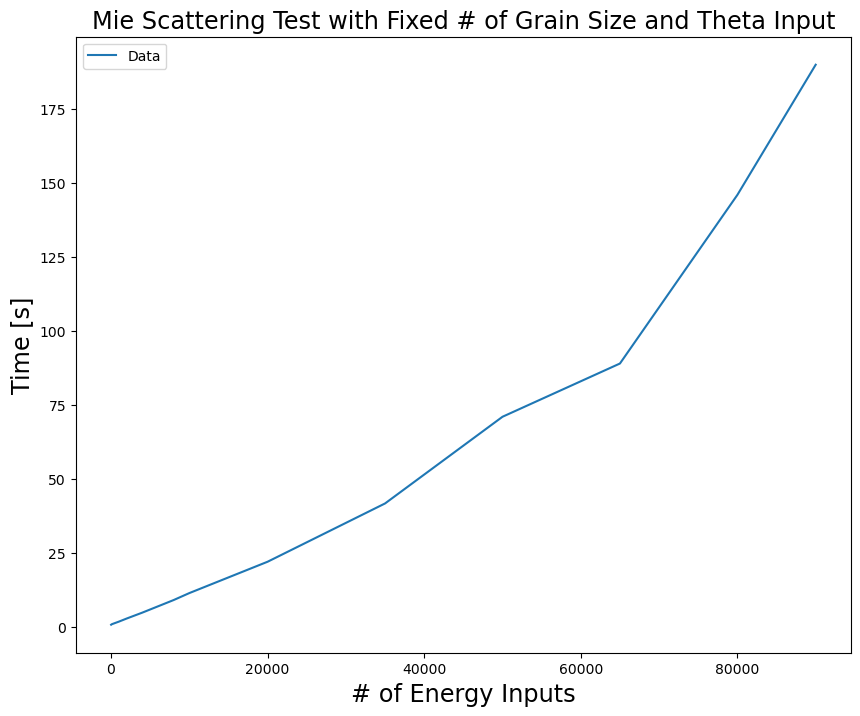

In [10]:
fig = plt.figure(figsize = (10, 8))
plt.plot(nEnergy, cpuE, label = 'Data')
#fitCoeffE, covarE = opt.curve_fit(pow_model, nEnergy, cpuE, [1, 8e-7])
#plt.plot(nEnergy, pow_model(nEnergy, fitCoeffE[0], fitCoeffE[1]), label = 'fit')
plt.title('Mie Scattering Test with Fixed # of Grain Size and Theta Input', fontsize = 'xx-large')
plt.xlabel('# of Energy Inputs', fontsize = 'xx-large')
plt.ylabel('Time [s]', fontsize = 'xx-large')
plt.legend()
plt.savefig('MieSE.png')
#print(fitCoeffE[0], fitCoeffE[1])

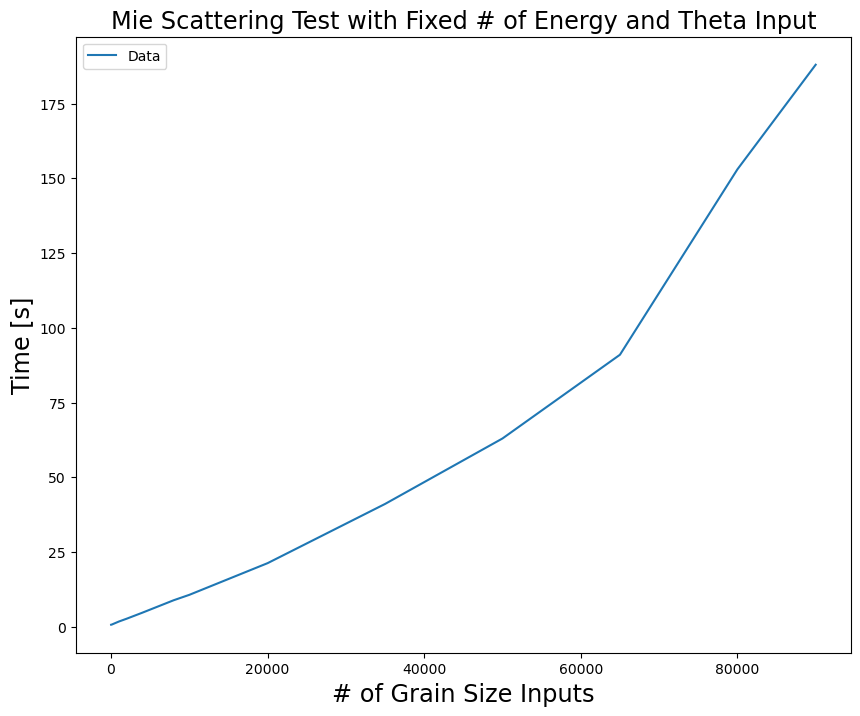

In [28]:
fig = plt.figure(figsize = (10, 8))
plt.plot(nGSize, cpuGS, label = 'Data')
#fitCoeffGS, covarGS = opt.curve_fit(pow_model, nGSize, cpuGS, [1.6,8e-7])
#plt.plot(nGSize, pow_model(nGSize, fitCoeffGS[0], fitCoeffGS[1]), label = 'Fit')
#print(fitCoeffGS[0], fitCoeffGS[1])
plt.title('Mie Scattering Test with Fixed # of Energy and Theta Input', fontsize = 'xx-large')
plt.xlabel('# of Grain Size Inputs', fontsize = 'xx-large')
plt.ylabel('Time [s]', fontsize = 'xx-large')
plt.legend()
plt.savefig('MieSGS.png')

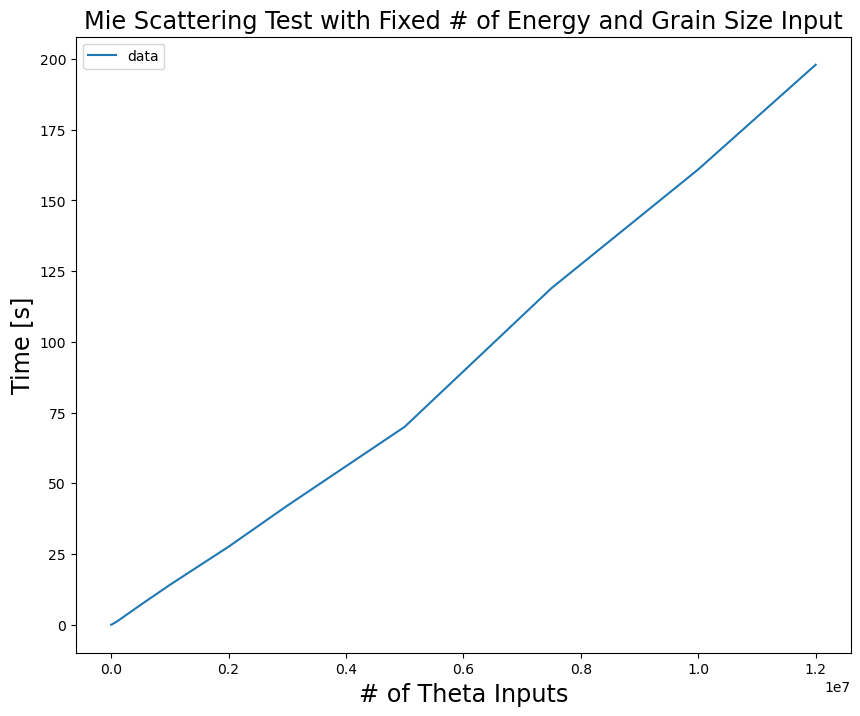

In [29]:
fig = plt.figure(figsize = (10, 8))
plt.plot(nTheta, cpuT, label = 'data')
#fitCoeffT, covarT = opt.curve_fit(linear_model, nTheta, cpuT, [1e-5])
#plt.plot(nTheta, linear_model(nTheta, fitCoeffT[0]), label = 'fit')
#print(fitCoeffT[0])
plt.title('Mie Scattering Test with Fixed # of Energy and Grain Size Input', fontsize = 'xx-large')
plt.xlabel('# of Theta Inputs', fontsize = 'xx-large')
plt.ylabel('Time [s]', fontsize = 'xx-large')
plt.legend()
plt.savefig('MieST.png')

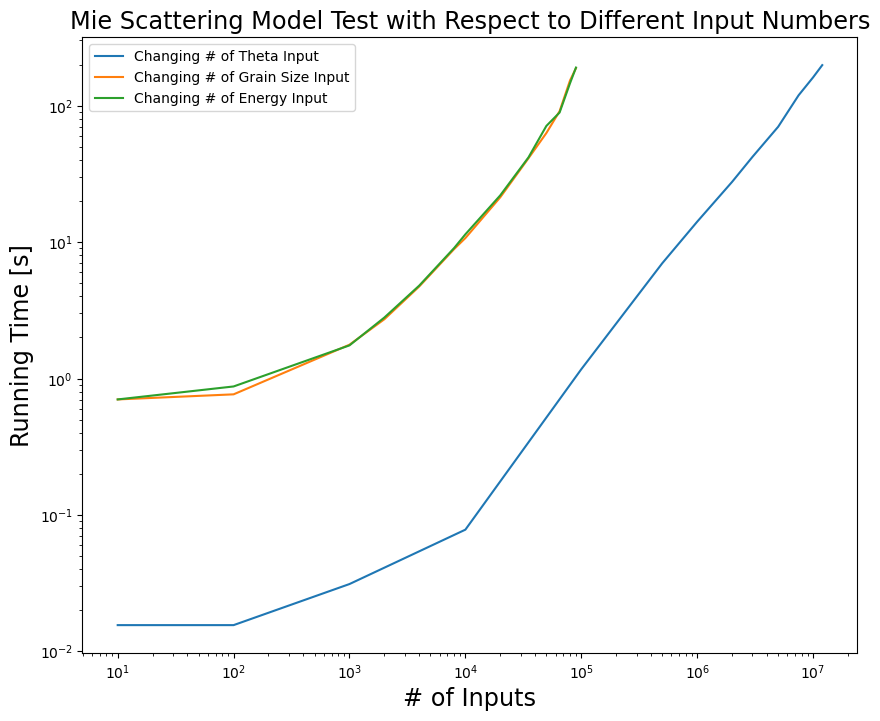

In [30]:
fig = plt.figure(figsize = (10, 8))
plt.plot(nTheta, cpuT, label = 'Changing # of Theta Input')
plt.plot(nGSize, cpuGS, label = 'Changing # of Grain Size Input')
plt.plot(nEnergy, cpuE, label = 'Changing # of Energy Input')
plt.legend()
plt.xlabel('# of Inputs', fontsize = 'xx-large')
plt.ylabel('Running Time [s]', fontsize = 'xx-large')
plt.title('Mie Scattering Model Test with Respect to Different Input Numbers', fontsize = 'xx-large')
plt.xscale('log')
plt.yscale('log')
plt.savefig('MieSall.png')

Mie Screen Halo Test

In [23]:
# tested data

nEnergy2 = np.array([10, 25, 50, 75, 100, 130, 160, 200, 250, 300, 320])
cpuE2 = np.array([5.38, 9.78, 17.1, 25.1, 32.2, 41.9, 50.1, 63, 89, 111, 114])

nTheta2 = np.array([10, 100, 1000, 3000, 6000, 10000, 15000, 20000, 30000, 40000, 50000])
cpuT2 = np.array([0.0625, 0.203, 3.34, 13, 25.8, 44.3, 65, 86, 129, 173, 217,])

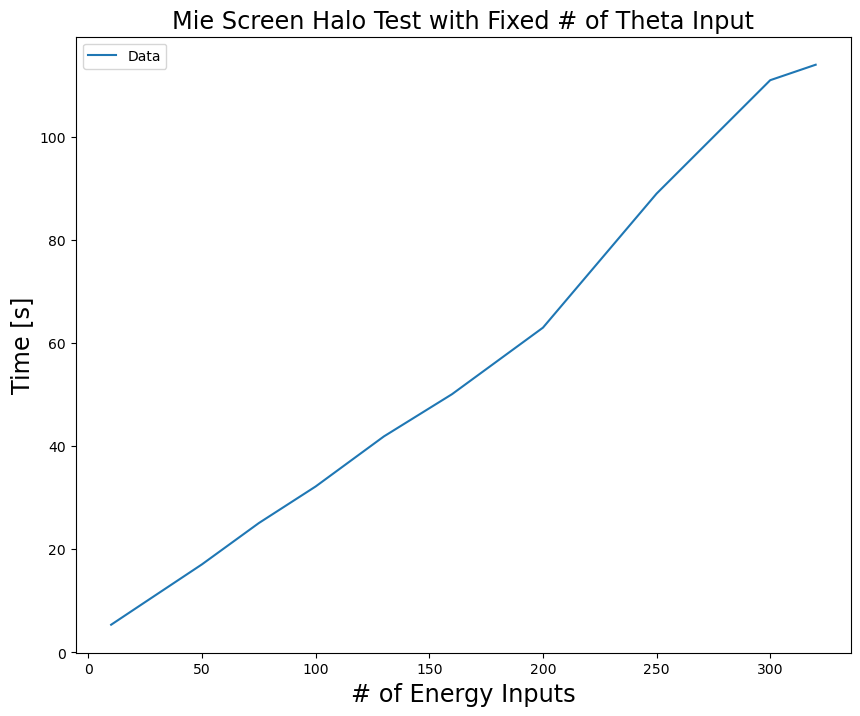

In [31]:
fig = plt.figure(figsize = (10, 8))
plt.plot(nEnergy2, cpuE2, label = 'Data')
#fitCoeffE2, covarE2 = opt.curve_fit(linear_model, nEnergy2, cpuE2, [1e-5])
#plt.plot(nEnergy2, linear_model(nEnergy2, fitCoeffE2[0]), label = 'Linear Fit')
#print(fitCoeffE2[0])
plt.title('Mie Screen Halo Test with Fixed # of Theta Input', fontsize = 'xx-large')
plt.xlabel('# of Energy Inputs', fontsize = 'xx-large')
plt.ylabel('Time [s]', fontsize = 'xx-large')
plt.legend()
plt.savefig('MieHE.png')

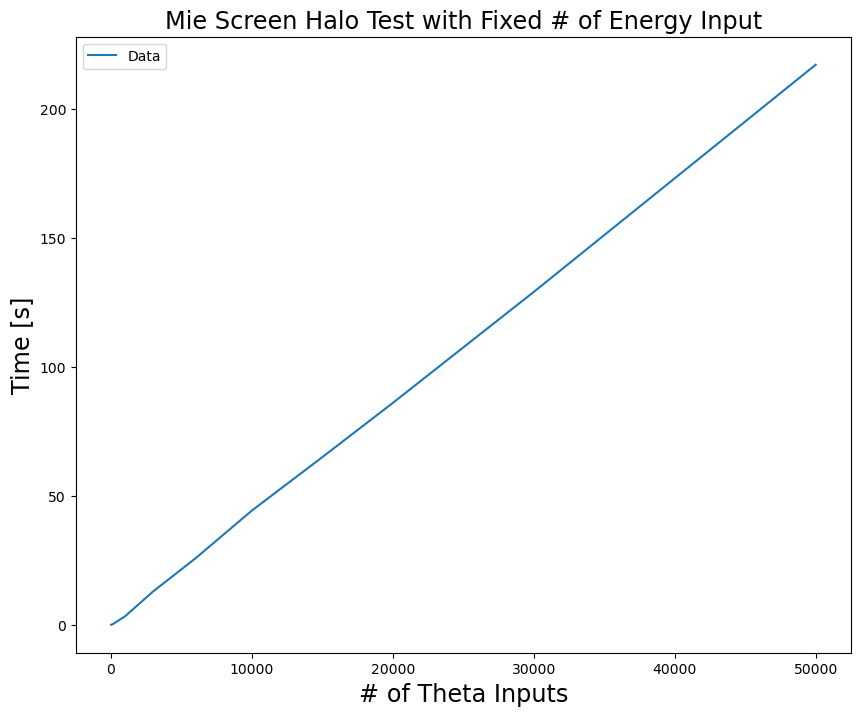

In [32]:
fig = plt.figure(figsize = (10, 8))
plt.plot(nTheta2, cpuT2, label = 'Data')
#fitCoeffT2, covarT2 = opt.curve_fit(linear_model, nTheta2, cpuT2, [1e-5])
#plt.plot(nTheta2, linear_model(nTheta2, fitCoeffT2[0]), label = 'Linear Fit')
#print(fitCoeffT2[0])
plt.title('Mie Screen Halo Test with Fixed # of Energy Input', fontsize = 'xx-large')
plt.xlabel('# of Theta Inputs', fontsize = 'xx-large')
plt.ylabel('Time [s]', fontsize = 'xx-large')
plt.legend()
plt.savefig('MieHT.png')

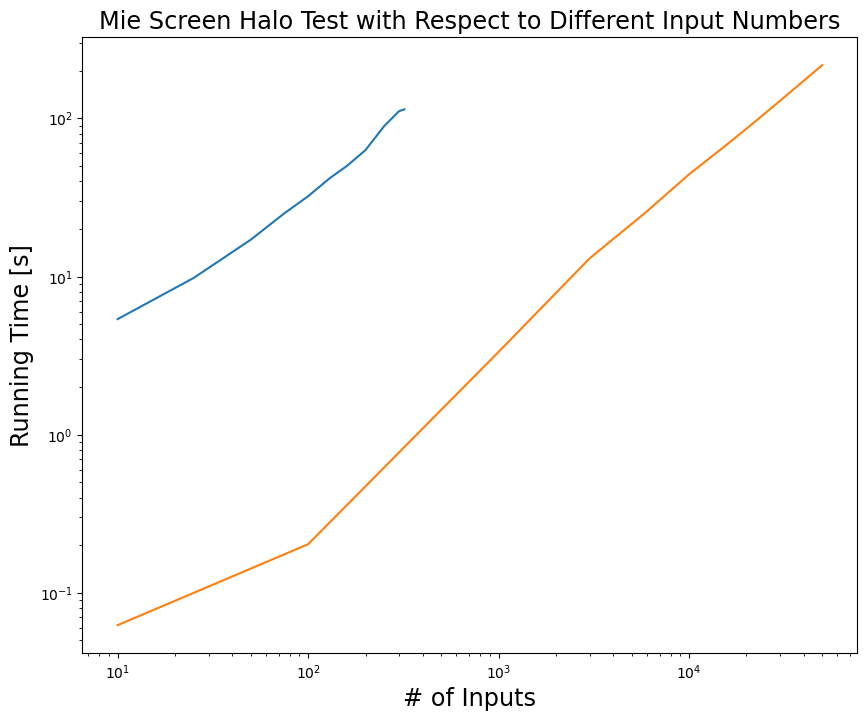

In [33]:
fig = plt.figure(figsize = (10, 8))
plt.plot(nEnergy2, cpuE2, label = 'Changing # of Energy Input')
plt.plot(nTheta2, cpuT2, label = 'Changing # of Theta Input')
plt.xlabel('# of Inputs', fontsize = 'xx-large')
plt.ylabel('Running Time [s]', fontsize = 'xx-large')
plt.title('Mie Screen Halo Test with Respect to Different Input Numbers', fontsize = 'xx-large')
plt.xscale('log')
plt.yscale('log')
plt.savefig('MieHall.png')